In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cust_df = pd.read_excel('./Dataset/p1-customers.xlsx')
cust_df.sample(10)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
640,Victoria Reier,Store Mailing List,1854,5111 Preserve Pkwy N,Greenwood Village,CO,80121,124.07,105,Yes,2,6
131,Brittney Shields,Store Mailing List,364,6451 W 74th Ave,Arvada,CO,80003,86.16,107,No,1,2
973,Nicole Fennessy,Store Mailing List,2901,17102 E Ford Dr,Aurora,CO,80017,125.83,104,Yes,1,2
2147,Susan Marcus,Credit Card Only,1967,5641 W 103rd Ave,Westminster,CO,80020,751.52,103,No,5,1
1418,Kathleen Rice,Loyalty Club Only,685,1342 S Race St,Denver,CO,80210,513.94,105,No,4,7
2133,Katie Cassady,Credit Card Only,1821,11556 E Center Dr,Aurora,CO,80012,919.52,100,No,17,6
1669,Michelle Flores,Loyalty Club Only,2026,408 S Carr St,Lakewood,CO,80226,427.79,106,No,3,4
342,Beth Baker,Store Mailing List,933,6820 W 84th Cir,Arvada,CO,80003,241.17,103,No,1,7
786,Alicia Jones,Store Mailing List,2318,3456 S Downing St,Englewood,CO,80113,160.84,100,No,1,7
205,Bernadette Mckale,Store Mailing List,569,2131 S Quentin Way,Aurora,CO,80014,187.93,105,No,1,7


In [5]:
cust_df.State.value_counts()

CO    2375
Name: State, dtype: int64

In [6]:
# check to see if there are some customers that buys a lot 
cust_df.Name.value_counts().head(15)

Jennifer Davis      2
Linda Smith         2
Maria Gonzalez      2
Jessie Ives         2
Elizabeth Harris    2
Rebecca Jones       2
Lynn Pacheco        2
Kelly Carlson       2
Jane Nelson         2
Erin Underwood      1
Chris Newberry      1
Pamela Geist        1
Jessica Paulus      1
Delores Vellinga    1
Jean Vanhoutte      1
Name: Name, dtype: int64

In [11]:
# Chech to see if there is duplicated value in the dataset
assert cust_df.duplicated().sum() == 0

In [31]:
# Check to see if there is any null value in any of the rows
assert cust_df.isnull().any(axis=1).sum() == 0

In [12]:
# Check to see the individual values in the customer segement
cust_df.Customer_Segment.value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

The Customer_Segment should be a categorical type

In [10]:
# check the number of cities present
print(cust_df.City.value_counts())
len(cust_df.City.value_counts())

Denver               750
Aurora               493
Arvada               247
Lakewood             217
Broomfield           125
Westminster           85
Centennial            78
Littleton             72
Englewood             56
Wheat Ridge           54
Thornton              35
Parker                27
Northglenn            24
Highlands Ranch       23
Golden                19
Greenwood Village     14
Edgewater             12
Commerce City         10
Superior               9
Morrison               7
Lafayette              5
Louisville             4
Boulder                3
Castle Pines           2
Brighton               2
Lone Tree              1
Henderson              1
Name: City, dtype: int64


27

In [35]:
#  whether there are omre than one state represented in the dataset 
cust_df.State.value_counts()

CO    2375
Name: State, dtype: int64

The state variable can be removed, since all the data are from just one state 

In [11]:
#checking the number of zip codes that exist in the dataset
cust_df.ZIP.value_counts().head(10)

80013    127
80219     93
80015     90
80012     88
80020     87
80004     80
80226     71
80014     71
80005     71
80247     57
Name: ZIP, dtype: int64

There are 86 zipcodes in the dataset

In [37]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   int64  
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  #_Years_as_Customer         2375 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [12]:
print(cust_df.Store_Number.value_counts(sort=False))
len(cust_df.Store_Number.value_counts(sort=False))

100    326
102     85
104    270
106    283
108    210
101    276
103    225
105    305
107    226
109    169
Name: Store_Number, dtype: int64


10

There are 10 stores in the data

In [40]:
cust_df.Responded_to_Last_Catalog.value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

Most of the time, there is no response to last clatalog

In [41]:
cust_df.Avg_Num_Products_Purchased.value_counts()

1     858
2     289
3     277
4     240
5     235
6     216
7     164
8      36
11     10
10      9
12      8
9       7
16      7
17      5
15      3
19      2
21      2
22      2
13      1
20      1
18      1
14      1
26      1
Name: Avg_Num_Products_Purchased, dtype: int64

In [48]:
cust_df = cust_df.rename(columns={'#_Years_as_Customer': 'No_of_Years_as_Customer'})

In [53]:
cust_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'No_of_Years_as_Customer'],
      dtype='object')

In [54]:
cust_df.No_of_Years_as_Customer.value_counts()

2    316
8    313
6    307
1    297
5    294
3    285
4    284
7    279
Name: No_of_Years_as_Customer, dtype: int64

## Data Cleaning
#### Cleanliness issues
* The Customer_Segment, Store_Number and Responded_to_Last_Catalog are wrongly saved as object instead of category
#### Tidiness issues 
* The state and zip code are not important for this analysis


#### Define
Change Customer_Segment, Store_Number and Responded_to_Last_Catalog to categorical types

#### Code

In [55]:
col_names = ['Customer_Segment', 'Store_Number', 'Responded_to_Last_Catalog']
for col in col_names:
    cust_df[col] = cust_df[col].astype('category')

#### Test

In [56]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Name                        2375 non-null   object  
 1   Customer_Segment            2375 non-null   category
 2   Customer_ID                 2375 non-null   int64   
 3   Address                     2375 non-null   object  
 4   City                        2375 non-null   object  
 5   State                       2375 non-null   object  
 6   ZIP                         2375 non-null   int64   
 7   Avg_Sale_Amount             2375 non-null   float64 
 8   Store_Number                2375 non-null   category
 9   Responded_to_Last_Catalog   2375 non-null   category
 10  Avg_Num_Products_Purchased  2375 non-null   int64   
 11  No_of_Years_as_Customer     2375 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(4)
memory usage: 174.8+ KB


#### Define
Delete state and zip code from dataset

#### Code

In [60]:
cust_df = cust_df.drop(['State', 'ZIP'], axis = 1)

#### Test

In [61]:
cust_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City',
       'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'No_of_Years_as_Customer'],
      dtype='object')

In [62]:
cust_df.sample(10)

,Name,Customer_Segment,Customer_ID,Address,City,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,No_of_Years_as_Customer
1632,Medina Amaya,Loyalty Club Only,1856,3900 W 1st Ave,Denver,385.63,103,No,1,1
1687,Kristalyn Deeds,Loyalty Club Only,2143,3347 S Elkhart St,Aurora,322.06,104,No,3,4
84,Doris Hackworth,Store Mailing List,227,6775 W 19th Pl,Lakewood,34.98,106,No,1,7
2015,Jessica Radke,Credit Card Only,1085,7663 Saulsbury St,Arvada,738.60,107,No,8,3
2035,Manuela Basurto,Credit Card Only,1213,1863 Wazee St,Denver,652.10,106,No,7,1
755,Bobbi Korneychuk,Store Mailing List,2236,950 Garnet St,Broomfield,217.45,109,Yes,1,6
322,Irma Ochoa,Store Mailing List,866,11495 Canterberry Ln,Parker,217.92,102,Yes,4,4
14,Ann Balliett,Store Mailing List,40,8192 W 81st Dr,Arvada,209.30,103,Yes,1,5
1419,Tomasa Macias,Loyalty Club Only,689,10346 Hunterwood Way,Highlands Ranch,397.05,101,No,4,8
1804,Geraldine Warner,Loyalty Club Only,2899,5504 E Utah Pl,Denver,306.44,100,No,2,7


### Interesting questions
* Which category of customer segment has the highest average sale
* Which of the city has the highest or the lowest average sale


## Univariate exploration

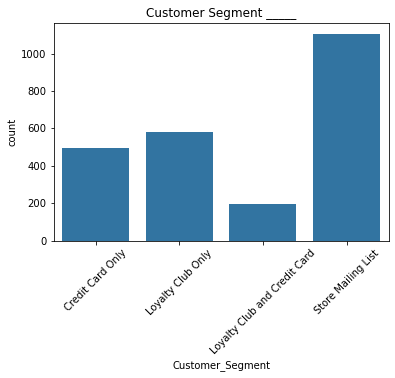

In [69]:
base_color = sns.color_palette()[0]
sns.countplot(data=cust_df, x = 'Customer_Segment', color=base_color);
plt.xticks(rotation=45)
plt.title('Customer Segment _____');

The store mailing list has the highest transaction

Text(0, 0.5, 'City')

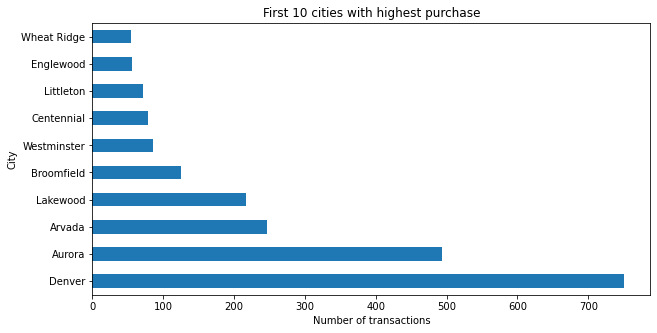

In [86]:
# Viewing the first ten cities with purchase
plt.figure(figsize=(10, 5))
cust_df.City.value_counts().head(10).plot(kind='barh')
plt.title('First 10 cities with highest purchase')
plt.xlabel('Number of transactions')
plt.ylabel('City');

Denver has the highest number of transactions

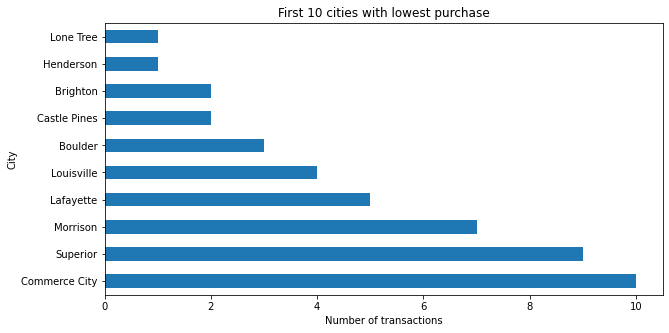

In [88]:
# Viewing the last ten cities with purchase
plt.figure(figsize=(10, 5))
cust_df.City.value_counts().tail(10).plot(kind='barh')
plt.title('First 10 cities with lowest purchase')
plt.xlabel('Number of transactions')
plt.ylabel('City');

Lone tree has the lowest number of transactiona

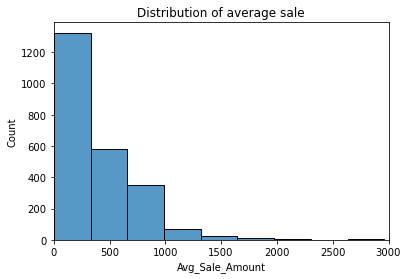

In [102]:
set_bins = np.linspace(cust_df.Avg_Sale_Amount.min(), cust_df.Avg_Sale_Amount.max(), 10)
sns.histplot(data=cust_df, x='Avg_Sale_Amount', bins=set_bins)
plt.title('Distribution of average sale')
plt.xlim(0,3000);

The distribution is right skewed, showing that there is posibility of outlier on the right

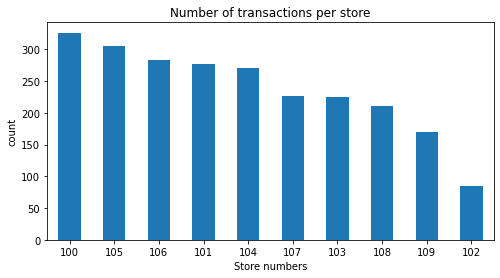

In [13]:
plt.figure(figsize=(8, 4))
cust_df.Store_Number.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of transactions per store')
plt.xlabel('Store numbers')
plt.ylabel('count');

The number of transactions per store

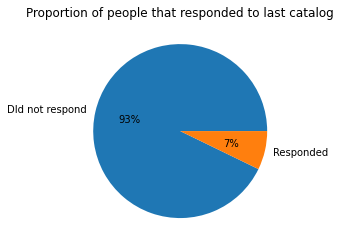

In [15]:
plt.pie(cust_df.Responded_to_Last_Catalog.value_counts(), labels = ['DId not respond', 'Responded '], autopct='%.0f%%' )
plt.title("Proportion of people that responded to last catalog");

There are more people that did not respond to their last catalog than those that attended to it

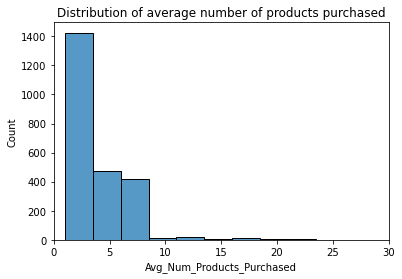

In [127]:
#set_bins = np.linspace(cust_df.Avg_Sale_Amount.min(), cust_df.Avg_Sale_Amount.max(), 10)
sns.histplot(data=cust_df, x='Avg_Num_Products_Purchased', bins = 10)
plt.title('Distribution of average number of products purchased')
plt.xlim(0,30);

Most of the purchase made are between 1 and 8

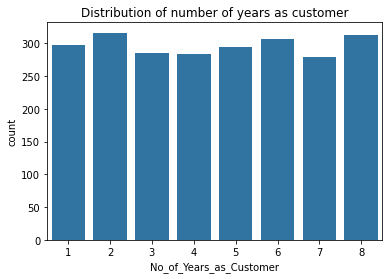

In [144]:
#set_bins = np.arange(1, 9, 1)
sns.countplot(data=cust_df, x='No_of_Years_as_Customer', color=base_color)
plt.title('Distribution of number of years as customer');

The difference in the different years are not so significant

## Bivariate Exploration